In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.optimize import least_squares
import pandas as pd
import glob
import seaborn as sns

In [3]:
df = pd.read_feather("combined_all_lambda_data.feather")
df

,event,lam_id,lam_pdg,lam_gen,lam_sim,lam_px,lam_py,lam_pz,lam_vx,lam_vy,...,gamtwo_py,gamtwo_pz,gamtwo_vx,gamtwo_vy,gamtwo_vz,gamtwo_epx,gamtwo_epy,gamtwo_epz,gamtwo_time,gamtwo_nd
0,0,4,3122,1,134217728,-0.481806,0.667223,22.881677,-0.065840,-0.008148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4,3122,1,134217728,-0.139277,0.062614,31.113912,-0.067507,0.000640,...,0.082274,3.843211,-4.236915,1.875058,940.263365,-182.985431,130.331637,6940.804748,3.073184,0.0
2,2,4,3122,1,134217728,-1.666138,0.211775,30.953969,-0.027048,0.006753,...,-0.035283,2.576297,-16.709645,2.127195,331.802817,-236.338462,-40.261238,3426.886648,0.948990,0.0
3,3,4,3122,1,134217728,-0.047907,0.293727,20.976907,0.073658,-0.005835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,3122,1,134217728,-0.728119,-0.635623,31.608930,-0.042067,0.001390,...,-0.015382,1.622836,-39.878694,-34.774637,1675.921870,-96.233964,-84.811255,6954.767017,5.966232,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563784,499995,4,3122,1,134217728,-0.009053,-0.654791,26.745864,-0.101977,-0.012837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563785,499996,4,3122,1,134217728,-0.884341,-0.615085,37.018614,-0.011745,-0.024622,...,0.054056,4.083450,-3.373053,-2.362499,184.886373,-227.016039,87.304909,6958.468336,0.329498,0.0
563786,499997,4,3122,1,134217728,-1.299756,-0.123300,25.804004,0.224168,-0.014203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563787,499998,4,3122,1,134217728,-0.165018,-0.626539,24.329761,-0.050402,0.038077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


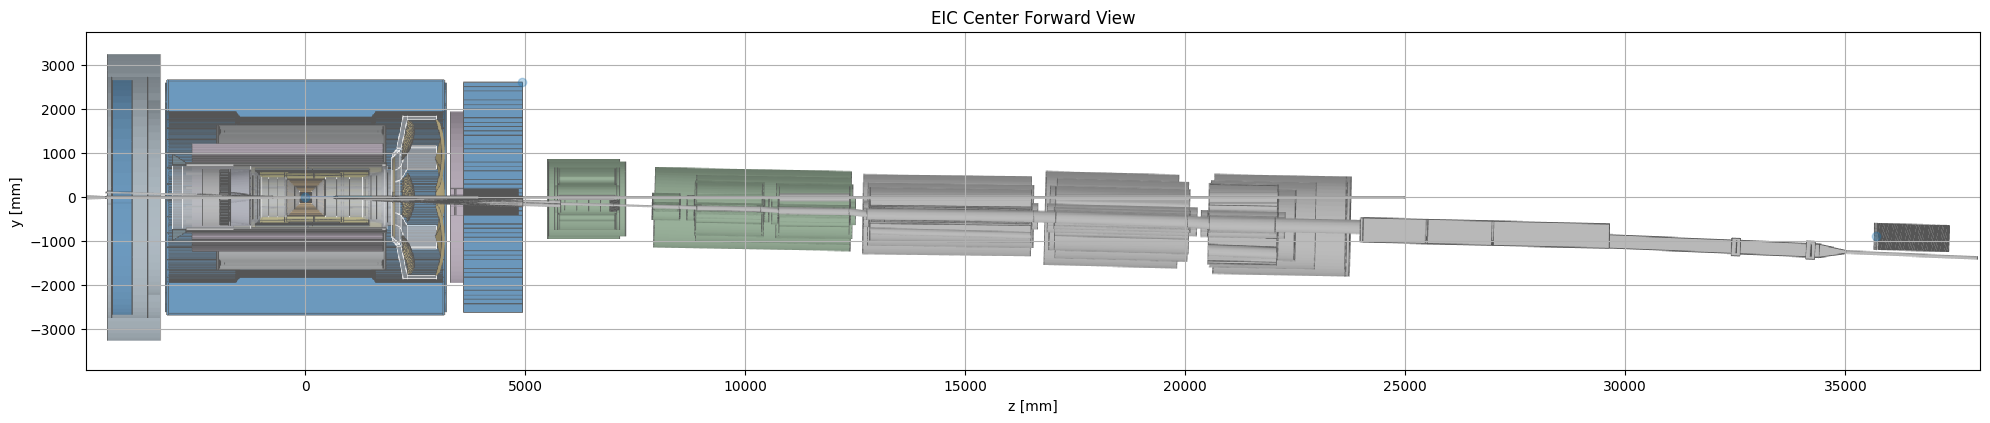

In [4]:
from aa_helpers import create_plot_with_background

fig, ax = create_plot_with_background()
x_axis = [0, 4937, 35690]
y_axis = [0, 2622, -878]


# Optional: overlay the reference points to verify alignment
ax.plot(x_axis, y_axis, marker="o", linestyle="none", alpha=0.3)

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)

# Uncomment to lock the view to the image bounds:
# ax.set_xlim(min(left_mm, right_mm), max(left_mm, right_mm))
# ax.set_ylim(min(bottom_mm, top_mm), max(bottom_mm, top_mm))

plt.tight_layout()
plt.show()



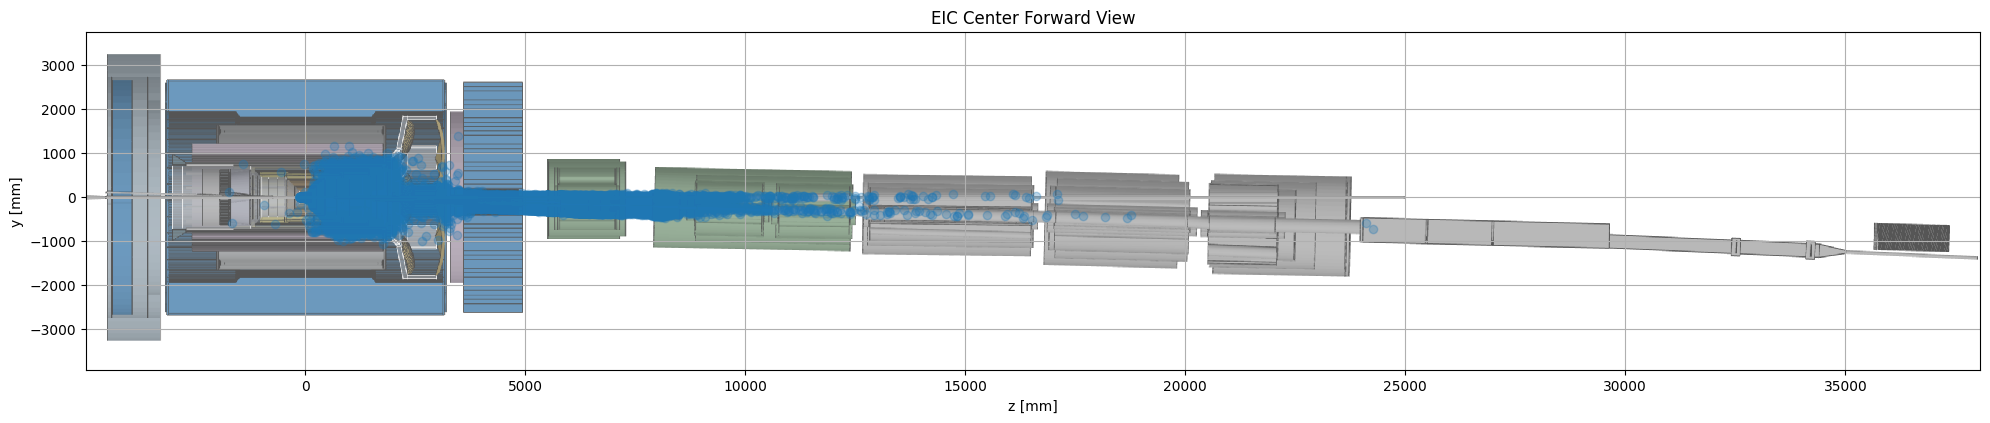

In [5]:
from aa_helpers import create_plot_with_background

fig, ax = create_plot_with_background()
x_axis = df.lam_epz
y_axis = df.lam_epx


# Optional: overlay the reference points to verify alignment
ax.plot(x_axis, y_axis, marker="o", linestyle="none", alpha=0.3)

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)

# Uncomment to lock the view to the image bounds:
# ax.set_xlim(min(left_mm, right_mm), max(left_mm, right_mm))
# ax.set_ylim(min(bottom_mm, top_mm), max(bottom_mm, top_mm))

plt.tight_layout()
plt.show()

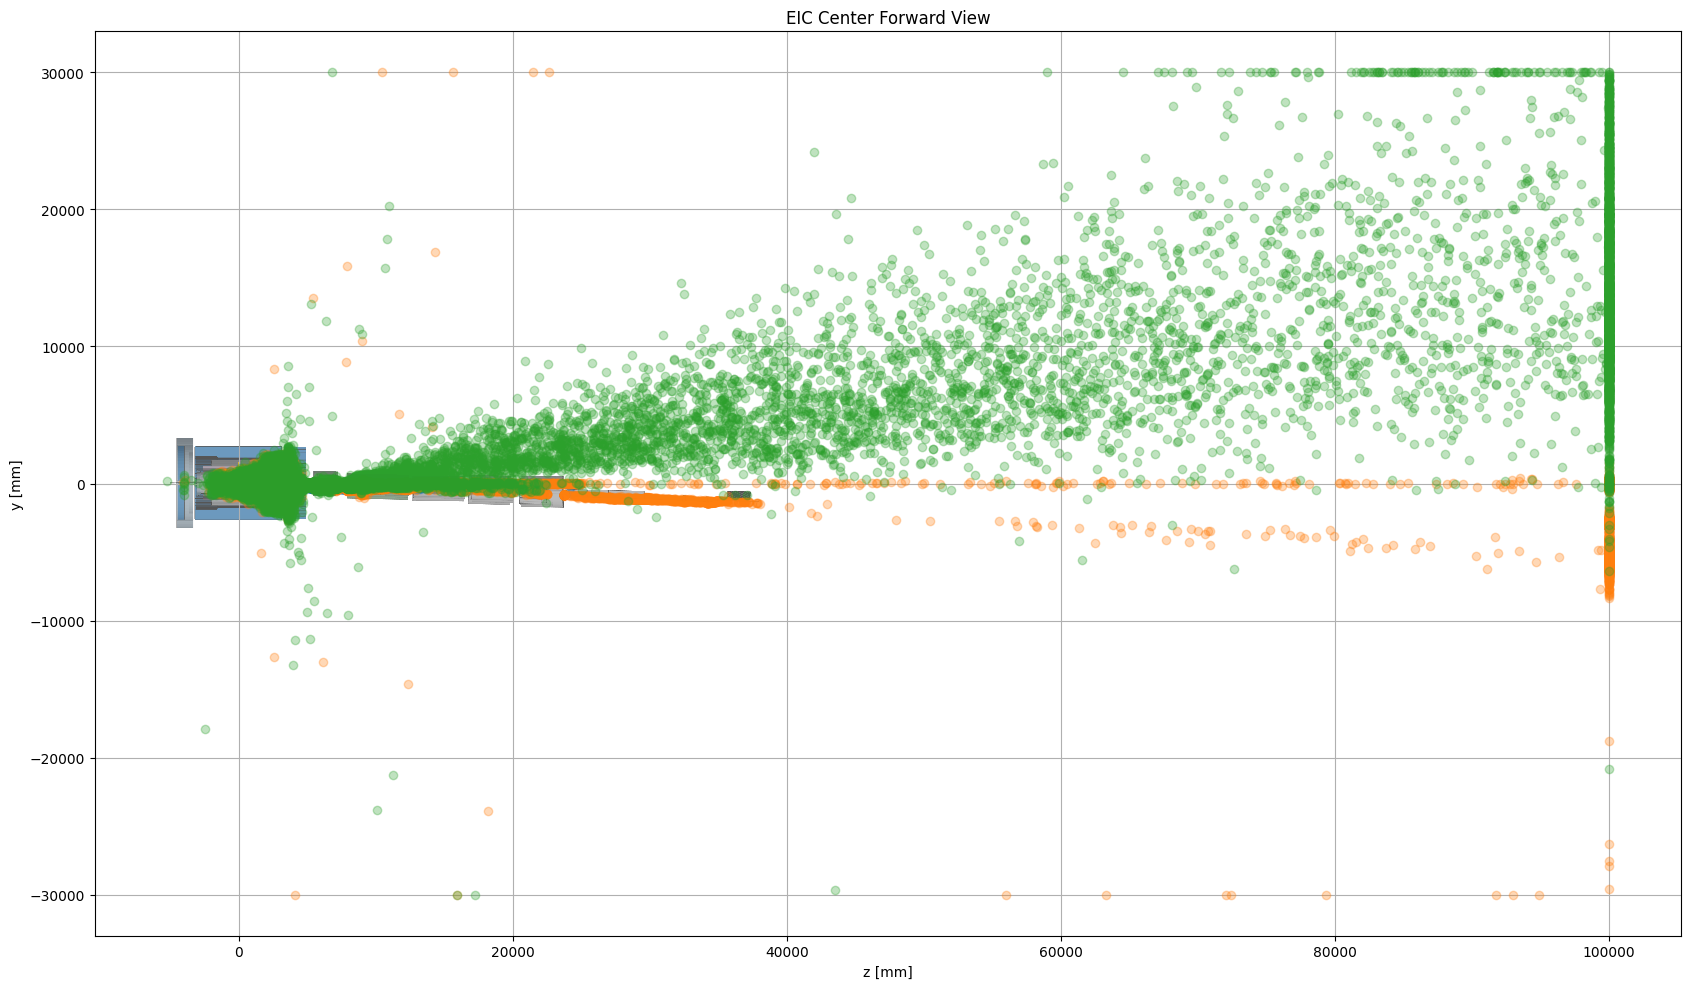

In [6]:
from aa_helpers import create_plot_with_background

fig, ax = create_plot_with_background()

# Optional: overlay the reference points to verify alignment
ax.plot(df.lam_epz, df.lam_epx, marker="o", linestyle="none", alpha=0.3)
ax.plot(df.prot_epz, df.prot_epx, marker="o", linestyle="none", alpha=0.3)
ax.plot(df.pimin_epz, df.pimin_epx, marker="o", linestyle="none", alpha=0.3)

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)

# Uncomment to lock the view to the image bounds:
# ax.set_xlim(min(left_mm, right_mm), max(left_mm, right_mm))
# ax.set_ylim(min(bottom_mm, top_mm), max(bottom_mm, top_mm))

plt.tight_layout()
plt.show()

In [7]:
"""
Functions to decode simulation status bit flags from a pandas DataFrame column.

This module provides utilities to extract individual boolean flags from a bit-packed
integer column, based on the C++ simulation status bit definitions.
"""

import pandas as pd
import numpy as np


# Bit positions for simulation flags (from C++ definitions)
BIT_POSITIONS = {
    'CreatedInSimulation': 30,
    'Backscatter': 29,
    'VertexIsNotEndpointOfParent': 28,
    'DecayedInTracker': 27,
    'DecayedInCalorimeter': 26,
    'LeftDetector': 25,
    'Stopped': 24,
    'Overlay': 23
}


def check_bit(value, bit_position):
    """
    Check if a specific bit is set in an integer value.

    Parameters
    ----------
    value : int or np.ndarray
        Integer value(s) to check
    bit_position : int
        Position of the bit to check (0-indexed from right)

    Returns
    -------
    bool or np.ndarray
        True if the bit is set, False otherwise
    """
    return (value & (1 << bit_position)) != 0


def validate_sim_column(df, sim_column):
    """
    Validate the simulation status column and check for invalid values.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame
    sim_column : str
        Name of the simulation status column

    Raises
    ------
    ValueError
        If column is missing or contains invalid values
    """
    if sim_column not in df.columns:
        raise ValueError(f"Column '{sim_column}' not found in DataFrame")

    # Check for NaN values
    nan_count = df[sim_column].isna().sum()
    if nan_count > 0:
        total_rows = len(df)
        nan_percentage = (nan_count / total_rows) * 100
        raise ValueError(
            f"Column '{sim_column}' contains {nan_count} NaN/None values "
            f"({nan_percentage:.2f}% of {total_rows} rows).\n"
            f"Please handle these values before decoding:\n"
            f"  Option 1: df = df.dropna(subset=['{sim_column}'])\n"
            f"  Option 2: df['{sim_column}'] = df['{sim_column}'].fillna(0)\n"
            f"  Option 3: df = df[df['{sim_column}'].notna()]"
        )

    # Check for infinite values
    if pd.api.types.is_numeric_dtype(df[sim_column]):
        inf_count = np.isinf(df[sim_column]).sum()
        if inf_count > 0:
            raise ValueError(
                f"Column '{sim_column}' contains {inf_count} infinite values.\n"
                f"Please filter these out before decoding."
            )


def decode_sim_flags(df, sim_column='lam_sim', prefix='lam_', inplace=False):
    """
    Decode simulation status bit flags into separate boolean columns.

    This function takes a DataFrame with a bit-packed integer column containing
    simulation status flags and creates separate boolean columns for each flag.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing the simulation status column
    sim_column : str, optional
        Name of the column containing the bit-packed simulation status.
        Default is 'lam_sim'.
    prefix : str, optional
        Prefix for the new column names. Default is 'lam_'.
    inplace : bool, optional
        If True, modify the DataFrame in place. If False, return a new DataFrame.
        Default is False.

    Returns
    -------
    pd.DataFrame or None
        Modified DataFrame if inplace=False, None if inplace=True

    Raises
    ------
    ValueError
        If the column is missing or contains NaN/None values

    Examples
    --------
    >>> # Create sample data
    >>> df = pd.DataFrame({'lam_sim': [0x40000000, 0x20000000, 0x60000000]})
    >>>
    >>> # Decode flags (creates new DataFrame)
    >>> df_decoded = decode_sim_flags(df)
    >>>
    >>> # Decode flags in place
    >>> decode_sim_flags(df, inplace=True)
    >>>
    >>> # Handle NaN values first
    >>> df = df.dropna(subset=['lam_sim'])
    >>> decode_sim_flags(df, inplace=True)
    """
    # Validate the column
    validate_sim_column(df, sim_column)

    if not inplace:
        df = df.copy()

    # Extract simulation status values
    sim_values = df[sim_column].values

    # Create boolean columns for each flag
    flag_columns = {}

    # CreatedInSimulation
    flag_columns[f'{prefix}isCreatedInSimulation'] = check_bit(sim_values, BIT_POSITIONS['CreatedInSimulation'])

    # Backscatter
    flag_columns[f'{prefix}isBackscatter'] = check_bit(sim_values, BIT_POSITIONS['Backscatter'])

    # VertexIsNotEndpointOfParent
    flag_columns[f'{prefix}vertexIsNotEndpointOfParent'] = check_bit(sim_values, BIT_POSITIONS['VertexIsNotEndpointOfParent'])

    # DecayedInTracker
    flag_columns[f'{prefix}isDecayedInTracker'] = check_bit(sim_values, BIT_POSITIONS['DecayedInTracker'])

    # DecayedInCalorimeter
    flag_columns[f'{prefix}isDecayedInCalorimeter'] = check_bit(sim_values, BIT_POSITIONS['DecayedInCalorimeter'])

    # LeftDetector (hasLeftDetector in C++)
    flag_columns[f'{prefix}hasLeftDetector'] = check_bit(sim_values, BIT_POSITIONS['LeftDetector'])

    # Stopped
    flag_columns[f'{prefix}isStopped'] = check_bit(sim_values, BIT_POSITIONS['Stopped'])

    # Overlay
    flag_columns[f'{prefix}isOverlay'] = check_bit(sim_values, BIT_POSITIONS['Overlay'])

    # Add all flag columns to DataFrame
    for col_name, col_values in flag_columns.items():
        df[col_name] = col_values

    if not inplace:
        return df

    return None


def decode_sim_flags_vectorized(df, sim_column='lam_sim', prefix='lam_', inplace=False, handle_nan='raise'):
    """
    Vectorized version of decode_sim_flags for better performance on large DataFrames.

    This is an optimized version that processes all rows at once using NumPy operations.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing the simulation status column
    sim_column : str, optional
        Name of the column containing the bit-packed simulation status.
        Default is 'lam_sim'.
    prefix : str, optional
        Prefix for the new column names. Default is 'lam_'.
    inplace : bool, optional
        If True, modify the DataFrame in place. If False, return a new DataFrame.
        Default is False.
    handle_nan : str, optional
        How to handle NaN values: 'raise' (default), 'skip', or 'zero'
        - 'raise': Raise an error if NaN values are found
        - 'skip': Set all flags to False for NaN rows
        - 'zero': Treat NaN as 0 (all flags False)

    Returns
    -------
    pd.DataFrame or None
        Modified DataFrame if inplace=False, None if inplace=True

    Raises
    ------
    ValueError
        If handle_nan='raise' and NaN values are found
    """
    if sim_column not in df.columns:
        raise ValueError(f"Column '{sim_column}' not found in DataFrame")

    if not inplace:
        df = df.copy()

    # Check for NaN values
    nan_mask = df[sim_column].isna()
    nan_count = nan_mask.sum()

    if nan_count > 0:
        if handle_nan == 'raise':
            total_rows = len(df)
            nan_percentage = (nan_count / total_rows) * 100
            raise ValueError(
                f"Column '{sim_column}' contains {nan_count} NaN/None values "
                f"({nan_percentage:.2f}% of {total_rows} rows).\n"
                f"Please handle these values before decoding:\ानुष\n"
                f"  Option 1: df = df.dropna(subset=['{sim_column}'])\n"
                f"  Option 2: df['{sim_column}'] = df['{sim_column}'].fillna(0)\n"
                f"  Option 3: Use handle_nan='skip' or handle_nan='zero' parameter"
            )
        elif handle_nan == 'zero':
            # Replace NaN with 0
            df.loc[nan_mask, sim_column] = 0
        # For 'skip', we'll handle it below when creating flag columns

    # Convert to numpy array for faster operations
    try:
        sim_values = df[sim_column].to_numpy(dtype=np.uint32)
    except (ValueError, TypeError) as e:
        # Provide more helpful error message
        unique_types = df[sim_column].apply(type).unique()
        raise ValueError(
            f"Cannot convert column '{sim_column}' to uint32. "
            f"Found data types: {unique_types}. "
            f"Original error: {e}"
        )

    # Define column names and their corresponding bit positions
    flag_definitions = [
        ('isCreatedInSimulation', 'CreatedInSimulation'),
        ('isBackscatter', 'Backscatter'),
        ('vertexIsNotEndpointOfParent', 'VertexIsNotEndpointOfParent'),
        ('isDecayedInTracker', 'DecayedInTracker'),
        ('isDecayedInCalorimeter', 'DecayedInCalorimeter'),
        ('hasLeftDetector', 'LeftDetector'),
        ('isStopped', 'Stopped'),
        ('isOverlay', 'Overlay')
    ]

    # Create all flag columns at once
    for flag_name, bit_key in flag_definitions:
        col_name = f'{prefix}{flag_name}'
        bit_pos = BIT_POSITIONS[bit_key]
        flag_values = (sim_values & (1 << bit_pos)) != 0

        # If handle_nan='skip', set flags to False for NaN rows
        if handle_nan == 'skip' and nan_count > 0:
            flag_values[nan_mask] = False

        df[col_name] = flag_values

    if not inplace:
        return df

    return None


def print_flag_summary(df, prefix='lam_', show_combinations=False):
    """
    Print a summary of simulation flags in the DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with decoded flag columns
    prefix : str, optional
        Prefix used for flag column names. Default is 'lam_'.
    show_combinations : bool, optional
        If True, also show top flag combinations. Default is False.

    Examples
    --------
    >>> decode_sim_flags(df, inplace=True)
    >>> print_flag_summary(df)
    >>> print_flag_summary(df, show_combinations=True)
    """
    print("\n" + "="*60)
    print("SIMULATION FLAG SUMMARY")
    print("="*60)

    flag_columns = [
        f'{prefix}isCreatedInSimulation',
        f'{prefix}isBackscatter',
        f'{prefix}vertexIsNotEndpointOfParent',
        f'{prefix}isDecayedInTracker',
        f'{prefix}isDecayedInCalorimeter',
        f'{prefix}hasLeftDetector',
        f'{prefix}isStopped',
        f'{prefix}isOverlay'
    ]

    found_columns = []
    for col in flag_columns:
        if col in df.columns:
            found_columns.append(col)
            count = df[col].sum()
            percentage = (count / len(df)) * 100
            flag_name = col.replace(prefix, '')
            print(f"{flag_name:30s}: {count:8d} ({percentage:6.2f}%)")

    print("="*60)
    print(f"Total particles: {len(df)}")
    print("="*60)

    if show_combinations and found_columns:
        print("\nTOP FLAG COMBINATIONS:")
        print("-"*60)
        combinations = get_flag_combinations(df, prefix)
        print(combinations.head(10).to_string())
        print("-"*60)

    print()


def get_flag_combinations(df, prefix='lam_', min_count=1):
    """
    Analyze common combinations of flags in the DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with decoded flag columns
    prefix : str, optional
        Prefix used for flag column names. Default is 'lam_'.
    min_count : int, optional
        Minimum count to include in results. Default is 1.

    Returns
    -------
    pd.DataFrame
        DataFrame showing flag combinations and their counts, sorted by frequency
    """
    flag_columns = [col for col in df.columns if col.startswith(prefix) and
                   col != f'{prefix}sim' and
                   (col.startswith(f'{prefix}is') or
                    col.startswith(f'{prefix}has') or
                    col.startswith(f'{prefix}vertex'))]

    if not flag_columns:
        raise ValueError(f"No flag columns found with prefix '{prefix}'")

    # Count combinations
    combination_counts = df[flag_columns].value_counts().reset_index()
    combination_counts.columns = list(combination_counts.columns[:-1]) + ['count']

    # Filter by minimum count
    combination_counts = combination_counts[combination_counts['count'] >= min_count]

    # Add percentage
    combination_counts['percentage'] = (combination_counts['count'] / len(df)) * 100

    # Add a description column showing which flags are set
    def describe_combination(row):
        active_flags = []
        for col in flag_columns:
            if row[col]:
                flag_name = col.replace(prefix, '')
                active_flags.append(flag_name)
        return ', '.join(active_flags) if active_flags else 'No flags set'

    combination_counts['description'] = combination_counts.apply(describe_combination, axis=1)

    return combination_counts

In [8]:
df.dropna(subset=['prot_sim'], inplace=True)
decode_sim_flags_vectorized(df, 'prot_sim', 'prot_', inplace=True)

In [9]:
df

,event,lam_id,lam_pdg,lam_gen,lam_sim,lam_px,lam_py,lam_pz,lam_vx,lam_vy,...,gamtwo_time,gamtwo_nd,prot_isCreatedInSimulation,prot_isBackscatter,prot_vertexIsNotEndpointOfParent,prot_isDecayedInTracker,prot_isDecayedInCalorimeter,prot_hasLeftDetector,prot_isStopped,prot_isOverlay
0,0,4,3122,1,134217728,-0.481806,0.667223,22.881677,-0.065840,-0.008148,...,NaN,NaN,True,False,False,True,False,False,True,False
3,3,4,3122,1,134217728,-0.047907,0.293727,20.976907,0.073658,-0.005835,...,NaN,NaN,True,False,False,False,True,False,True,False
7,7,4,3122,1,134217728,-0.874955,-0.206428,27.917657,0.178236,-0.011964,...,NaN,NaN,True,False,False,False,True,False,True,False
8,8,4,3122,1,150994944,-1.145689,-0.947432,37.379094,0.162403,-0.000465,...,NaN,NaN,True,False,False,True,False,False,True,False
10,9,4,3122,1,150994944,-1.161694,0.547496,30.139161,0.093463,-0.033021,...,NaN,NaN,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563783,499994,134,3122,0,1207959552,0.030177,-0.450537,3.775613,-132.761314,10.319317,...,NaN,NaN,True,False,False,False,True,False,True,False
563784,499995,4,3122,1,134217728,-0.009053,-0.654791,26.745864,-0.101977,-0.012837,...,NaN,NaN,True,False,False,True,False,False,True,False
563786,499997,4,3122,1,134217728,-1.299756,-0.123300,25.804004,0.224168,-0.014203,...,NaN,NaN,True,False,False,True,False,False,True,False
563787,499998,4,3122,1,134217728,-0.165018,-0.626539,24.329761,-0.050402,0.038077,...,NaN,NaN,True,False,False,False,True,False,True,False


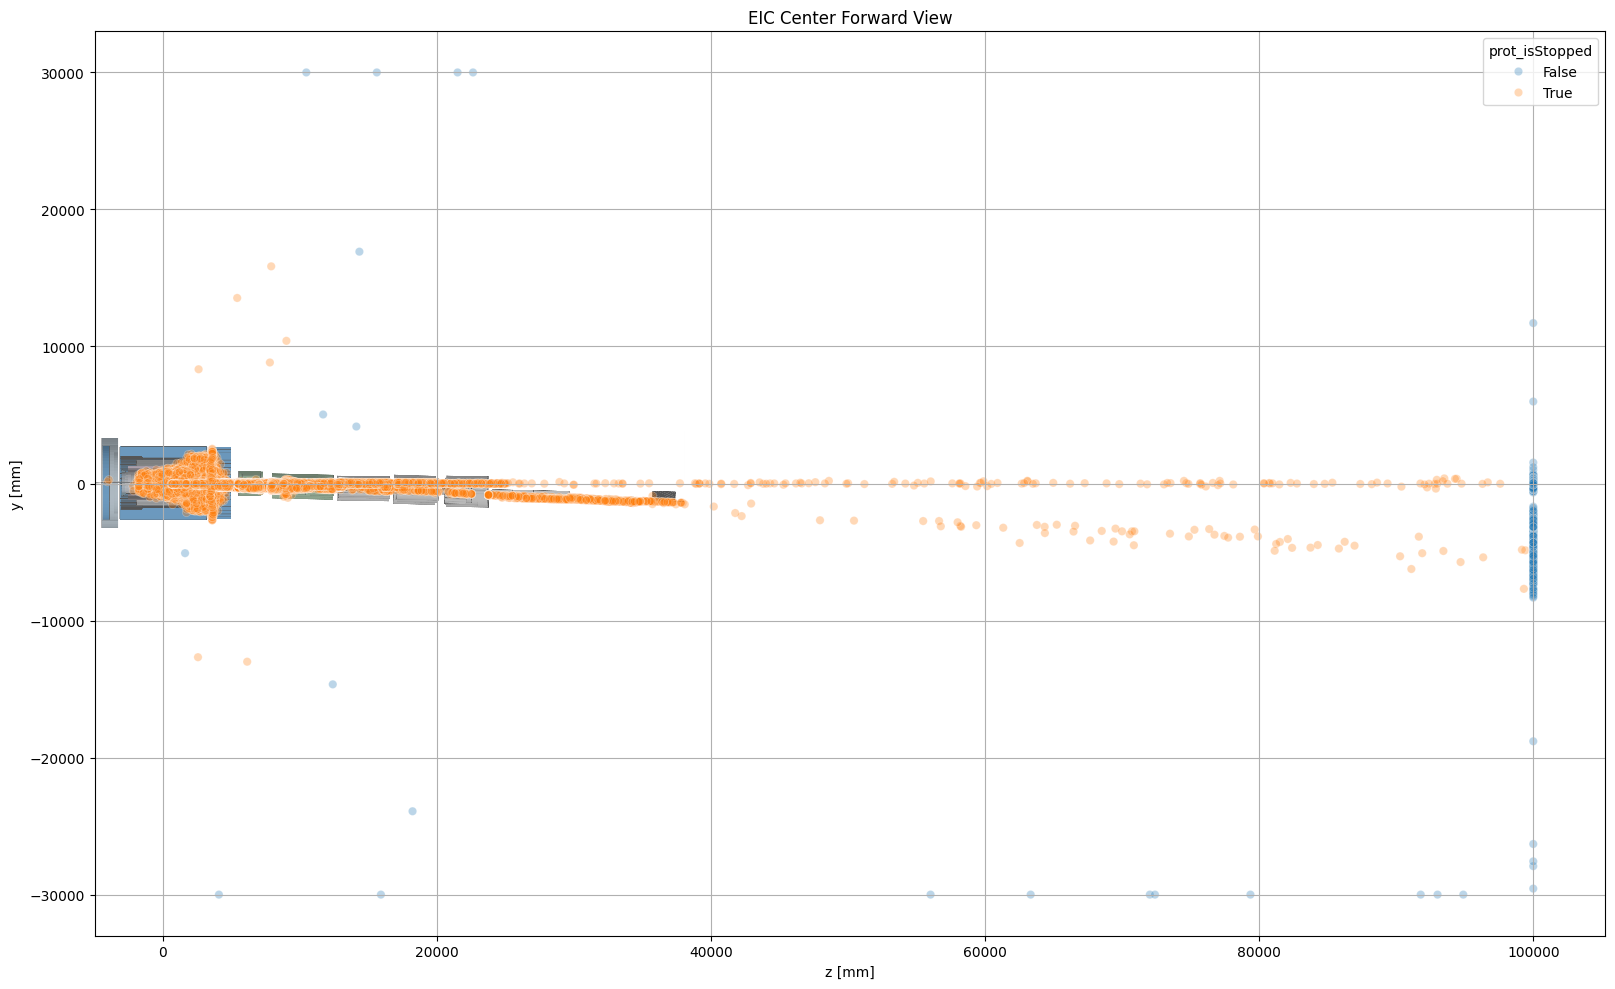

In [10]:
from aa_helpers import create_plot_with_background

fig, ax = create_plot_with_background()

# Optional: overlay the reference points to verify alignment


# One line solution!
sns.scatterplot(data=df, x='prot_epz', y='prot_epx',
                hue='prot_isStopped', alpha=0.3, ax=ax)

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)

# Uncomment to lock the view to the image bounds:
# ax.set_xlim(min(left_mm, right_mm), max(left_mm, right_mm))
# ax.set_ylim(min(bottom_mm, top_mm), max(bottom_mm, top_mm))

plt.tight_layout()
plt.show()

In [11]:
df.dropna(subset=['lam_sim'], inplace=True)
decode_sim_flags_vectorized(df, 'lam_sim', 'lam_', inplace=True)

In [12]:
df

,event,lam_id,lam_pdg,lam_gen,lam_sim,lam_px,lam_py,lam_pz,lam_vx,lam_vy,...,prot_isStopped,prot_isOverlay,lam_isCreatedInSimulation,lam_isBackscatter,lam_vertexIsNotEndpointOfParent,lam_isDecayedInTracker,lam_isDecayedInCalorimeter,lam_hasLeftDetector,lam_isStopped,lam_isOverlay
0,0,4,3122,1,134217728,-0.481806,0.667223,22.881677,-0.065840,-0.008148,...,True,False,False,False,False,True,False,False,False,False
3,3,4,3122,1,134217728,-0.047907,0.293727,20.976907,0.073658,-0.005835,...,True,False,False,False,False,True,False,False,False,False
7,7,4,3122,1,134217728,-0.874955,-0.206428,27.917657,0.178236,-0.011964,...,True,False,False,False,False,True,False,False,False,False
8,8,4,3122,1,150994944,-1.145689,-0.947432,37.379094,0.162403,-0.000465,...,True,False,False,False,False,True,False,False,True,False
10,9,4,3122,1,150994944,-1.161694,0.547496,30.139161,0.093463,-0.033021,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563783,499994,134,3122,0,1207959552,0.030177,-0.450537,3.775613,-132.761314,10.319317,...,True,False,True,False,False,True,False,False,False,False
563784,499995,4,3122,1,134217728,-0.009053,-0.654791,26.745864,-0.101977,-0.012837,...,True,False,False,False,False,True,False,False,False,False
563786,499997,4,3122,1,134217728,-1.299756,-0.123300,25.804004,0.224168,-0.014203,...,True,False,False,False,False,True,False,False,False,False
563787,499998,4,3122,1,134217728,-0.165018,-0.626539,24.329761,-0.050402,0.038077,...,True,False,False,False,False,True,False,False,False,False


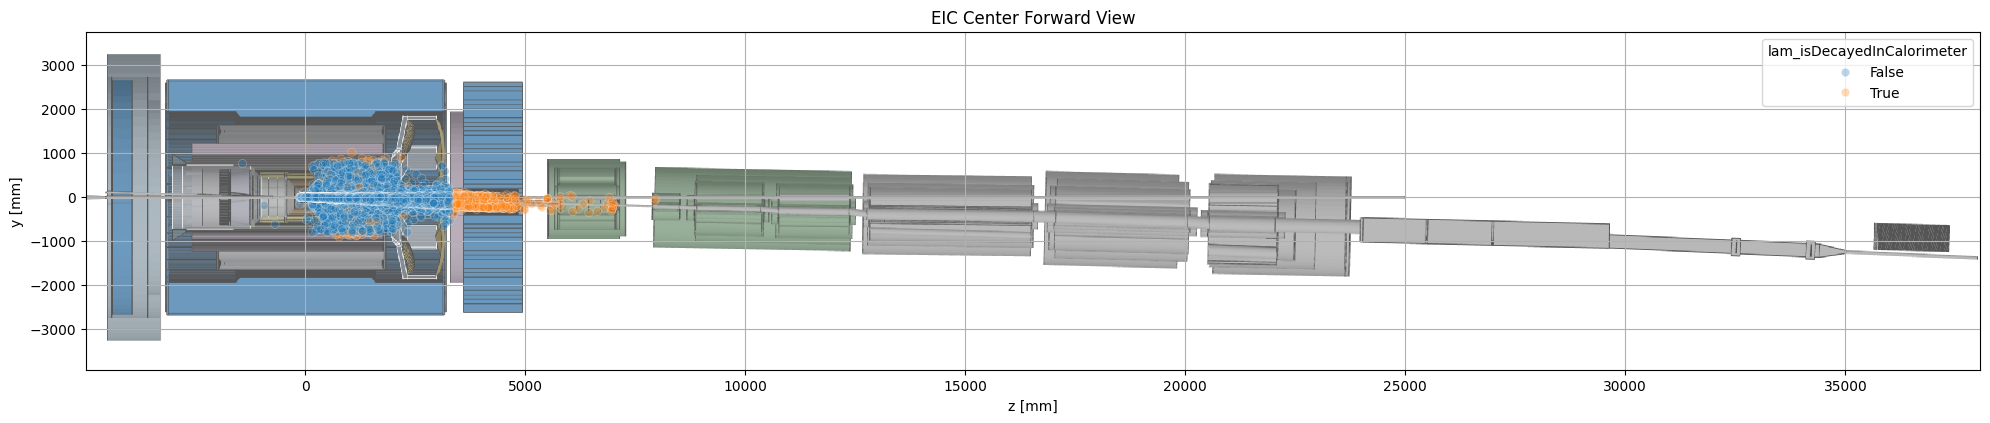

In [13]:
x  = df['lam_epz']
y = df['lam_epx']
r = np.sqrt(x*x + y*y) * np.sign(y)

fig, ax = create_plot_with_background()

# Optional: overlay the reference points to verify alignment


# One line solution!
sns.scatterplot(data=df, x=x, y=y,
                hue='lam_isDecayedInCalorimeter', alpha=0.3, ax=ax)

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)

# Uncomment to lock the view to the image bounds:
# ax.set_xlim(min(left_mm, right_mm), max(left_mm, right_mm))
# ax.set_ylim(min(bottom_mm, top_mm), max(bottom_mm, top_mm))

plt.tight_layout()
plt.show()

In [14]:
lam_decayed_in_calo = df['lam_isDecayedInCalorimeter'].sum()
total_lam = len(df)

print(f"decayed in Calorimeter: {lam_decayed_in_calo}")
print(f"{lam_decayed_in_calo/total_lam*100:.2f}%")

decayed in Calorimeter: 1493
0.44%


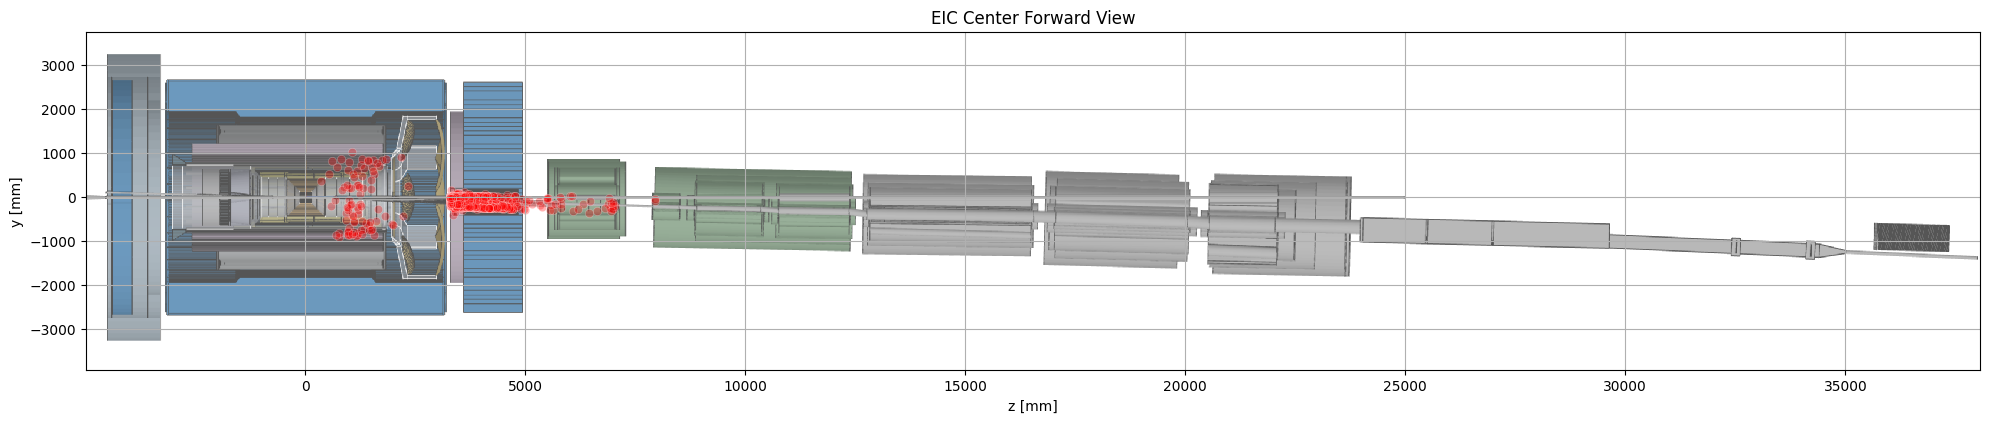

In [15]:
isDecayedInCalorimeter_df = df[df['lam_isDecayedInCalorimeter']]

x  = isDecayedInCalorimeter_df['lam_epz']
y =  isDecayedInCalorimeter_df['lam_epx']

fig, ax = create_plot_with_background()

# Optional: overlay the reference points to verify alignment


# One line solution!
sns.scatterplot(data=isDecayedInCalorimeter_df, x=x, y=y,color='red',
                 alpha=0.3, ax=ax)

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)

# Uncomment to lock the view to the image bounds:
# ax.set_xlim(min(left_mm, right_mm), max(left_mm, right_mm))
# ax.set_ylim(min(bottom_mm, top_mm), max(bottom_mm, top_mm))

plt.tight_layout()
plt.show()

In [16]:
df.dropna(subset=['pimin_sim'], inplace=True)
decode_sim_flags_vectorized(df, 'pimin_sim', 'pimin_', inplace=True)

In [17]:
lam_prot_pimin_df = df[
    df['lam_isDecayedInTracker'] & 
    df['prot_isDecayedInTracker'] & 
    df['pimin_isDecayedInTracker']
]

print("Λ → p + π⁻ in the tracker")

print(f"{len(lam_prot_pimin_df)}")
print(f"{len(lam_prot_pimin_df)/len(df)*100:.2f}%")

Λ → p + π⁻ in the tracker
41870
13.11%


In [18]:
lam_prot_pimin_df

,event,lam_id,lam_pdg,lam_gen,lam_sim,lam_px,lam_py,lam_pz,lam_vx,lam_vy,...,lam_isStopped,lam_isOverlay,pimin_isCreatedInSimulation,pimin_isBackscatter,pimin_vertexIsNotEndpointOfParent,pimin_isDecayedInTracker,pimin_isDecayedInCalorimeter,pimin_hasLeftDetector,pimin_isStopped,pimin_isOverlay
80,71,4,3122,1,134217728,-0.081055,-0.164022,24.872267,-0.087409,-0.004069,...,False,False,True,False,False,True,False,False,True,False
84,74,43,3122,0,1207959552,0.234589,-0.246156,0.146587,-28.815645,19.406182,...,False,False,True,False,False,True,False,False,False,False
94,83,4,3122,1,134217728,-1.013811,-1.097061,37.420263,0.270744,0.035907,...,False,False,True,False,False,True,False,False,True,False
97,86,4,3122,1,150994944,-1.882164,-0.088755,37.333638,0.184191,0.011845,...,True,False,True,False,False,True,False,False,True,False
105,91,167,3122,0,1224736768,-0.873559,-0.428701,21.193913,-27.392804,-61.739374,...,True,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563734,499949,4,3122,1,150994944,-1.869112,-0.233623,37.413045,0.010730,0.007294,...,True,False,True,False,False,True,False,False,True,False
563736,499950,4,3122,1,150994944,-0.028605,0.340984,18.426521,0.222978,-0.009683,...,True,False,True,False,False,True,False,False,True,False
563746,499960,4,3122,1,150994944,-1.542890,1.103882,40.626852,-0.245210,0.005549,...,True,False,True,False,False,True,False,False,True,False
563769,499981,4,3122,1,134217728,-0.502834,-1.155560,40.922390,-0.199363,0.004703,...,False,False,True,False,False,True,False,False,True,False


C:\Users\fijif\AppData\Local\Temp\ipykernel_18116\1779002443.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=lam_prot_pimin_df, x=x, y=y,


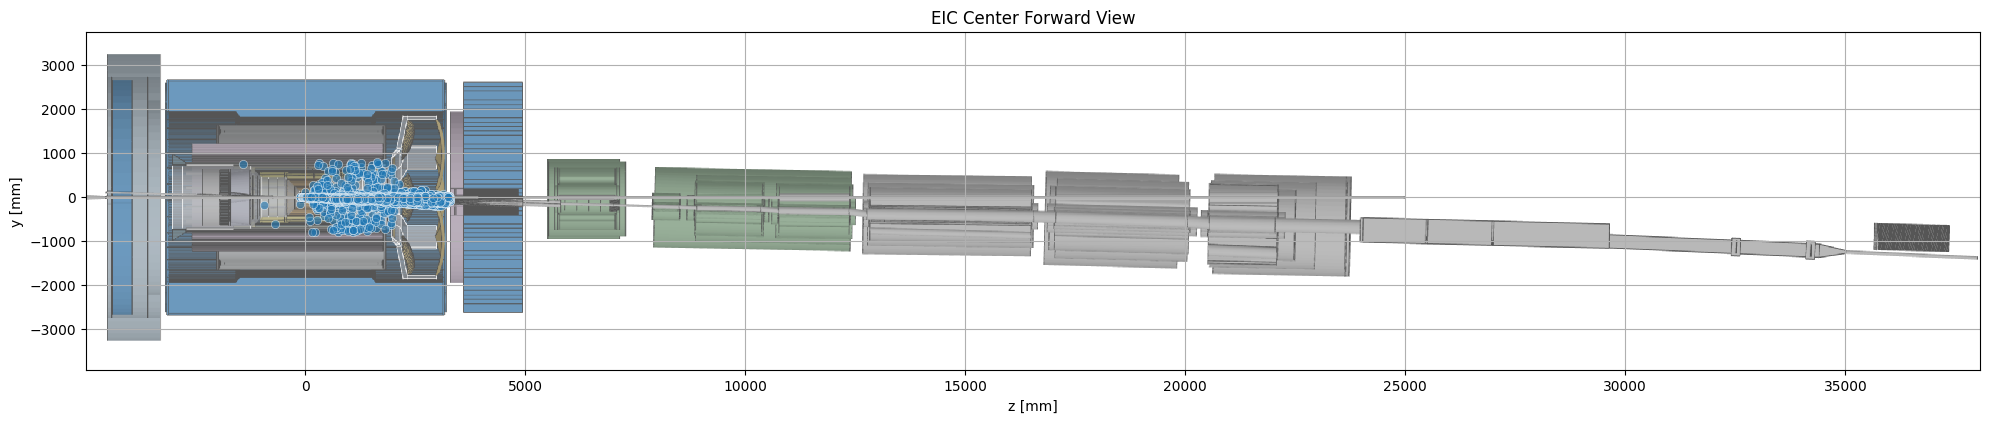

In [19]:
x = lam_prot_pimin_df['lam_epz']
y = lam_prot_pimin_df['lam_epx']


fig, ax = create_plot_with_background()

# One line solution!
sns.scatterplot(data=lam_prot_pimin_df, x=x, y=y, 
                alpha=0.6, ax=ax, palette='viridis')


ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)


plt.tight_layout()
plt.show()



In [20]:
# Filter events where proton is in tracker, and pion is in calorimeter OR tracker
target_events = df[
    df['lam_isDecayedInTracker'] & 
    df['prot_isDecayedInTracker'] & 
    (df['pimin_isDecayedInTracker'] | df['pimin_isDecayedInCalorimeter'])
]

# Split into subcategories
pion_in_tracker = target_events[target_events['pimin_isDecayedInTracker']]
pion_in_calo = target_events[target_events['pimin_isDecayedInCalorimeter']]

print("═" * 70)
print("Λ → p + π⁻: PROTON IN TRACKER, PION IN TRACKER/CALORIMETER")
print("═" * 70)
print(f"Total events: {len(df)}")
print(f"Proton in tracker + pion in tracker/calorimeter: {len(target_events)} ({len(target_events)/len(df)*100:.1f}%)")
print(f"  - Pion in tracker: {len(pion_in_tracker)} ({len(pion_in_tracker)/len(target_events)*100:.1f}%)")
print(f"  - Pion in calorimeter: {len(pion_in_calo)} ({len(pion_in_calo)/len(target_events)*100:.1f}%)")

══════════════════════════════════════════════════════════════════════
Λ → p + π⁻: PROTON IN TRACKER, PION IN TRACKER/CALORIMETER
══════════════════════════════════════════════════════════════════════
Total events: 319282
Proton in tracker + pion in tracker/calorimeter: 118629 (37.2%)
  - Pion in tracker: 41870 (35.3%)
  - Pion in calorimeter: 76759 (64.7%)


C:\Users\fijif\AppData\Local\Temp\ipykernel_18116\2093310894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_events['color_category'] = 'other'


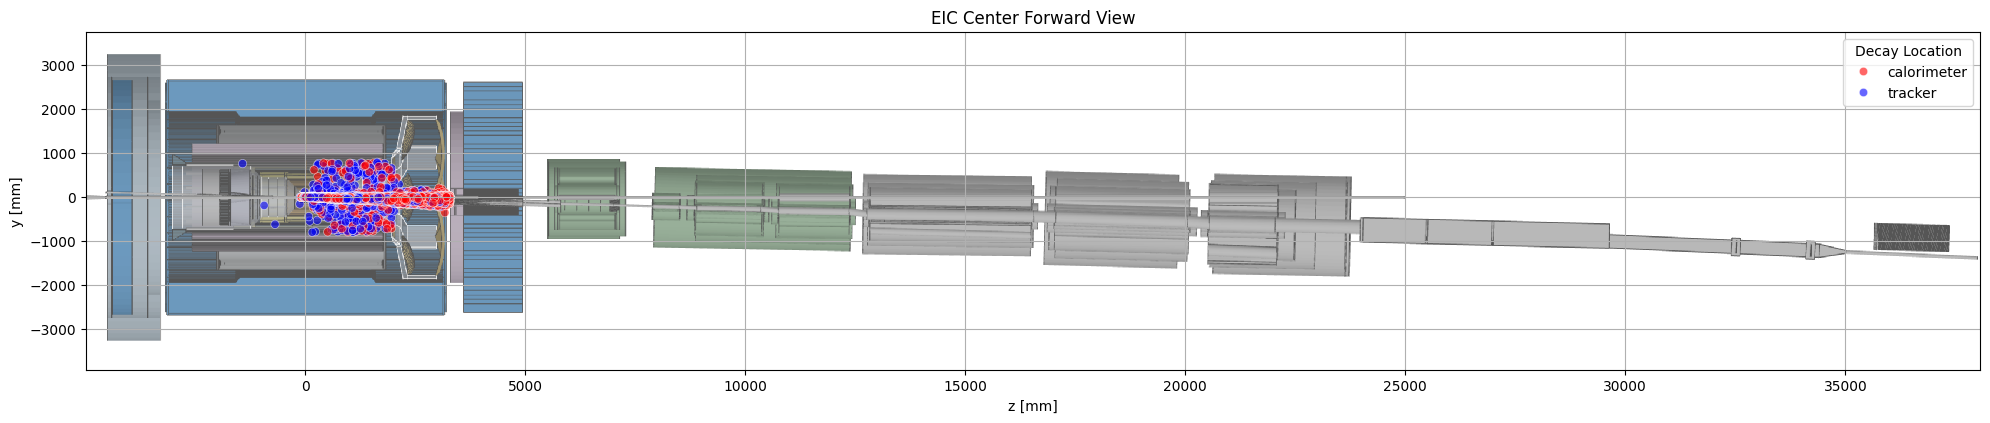

In [21]:


x = target_events['lam_epz']
y = target_events['lam_epx'] 

target_events['color_category'] = 'other'
target_events.loc[df['lam_isDecayedInTracker'] & 
                 df['prot_isDecayedInTracker'] & 
                 df['pimin_isDecayedInTracker'], 'color_category'] = 'tracker'
target_events.loc[df['lam_isDecayedInTracker'] & 
                 df['prot_isDecayedInTracker'] & 
                 df['pimin_isDecayedInCalorimeter'], 'color_category'] = 'calorimeter'

fig, ax = create_plot_with_background()


sns.scatterplot(data=target_events, x=x, y=y, 
                hue='color_category', 
                alpha=0.6, ax=ax, 
                palette={'tracker': 'blue', 'calorimeter': 'red', 'other': 'gray'})  

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)
ax.legend(title="Decay Location")

plt.tight_layout()
plt.show()

In [22]:
combinations = {
    'All events': df['lam_isDecayedInTracker'],
    'p in tracker, π⁻ in tracker': df['prot_isDecayedInTracker'] & df['pimin_isDecayedInTracker'],
    'p in tracker, π⁻ in calorimeter': df['prot_isDecayedInTracker'] & df['pimin_isDecayedInCalorimeter'],
    'p in tracker, π⁻ escaped': df['prot_isDecayedInTracker'] & df['pimin_hasLeftDetector'],
    'p in calorimeter, π⁻ in tracker': df['prot_isDecayedInCalorimeter'] & df['pimin_isDecayedInTracker'],
    'p in calorimeter, π⁻ in calorimeter': df['prot_isDecayedInCalorimeter'] & df['pimin_isDecayedInCalorimeter'],
    'p escaped, π⁻ in tracker': df['prot_hasLeftDetector'] & df['pimin_isDecayedInTracker'],
    'p escaped, π⁻ in calorimeter': df['prot_hasLeftDetector'] & df['pimin_isDecayedInCalorimeter']
}

print("═" * 80)
print("ALL POSSIBLE COMBINATIONS OF DAUGHTER PARTICLE STATES")
print("═" * 80)

results = {}
for name, mask in combinations.items():
    count = len(df[mask])
    results[name] = count
    print(f"{name:<40}: {count:6d} ({count/len(df)*100:6.2f}%)")

print("═" * 80)

════════════════════════════════════════════════════════════════════════════════
ALL POSSIBLE COMBINATIONS OF DAUGHTER PARTICLE STATES
════════════════════════════════════════════════════════════════════════════════
All events                              : 319274 (100.00%)
p in tracker, π⁻ in tracker             :  41875 ( 13.12%)
p in tracker, π⁻ in calorimeter         :  76762 ( 24.04%)
p in tracker, π⁻ escaped                :    529 (  0.17%)
p in calorimeter, π⁻ in tracker         :  45318 ( 14.19%)
p in calorimeter, π⁻ in calorimeter     : 150155 ( 47.03%)
p escaped, π⁻ in tracker                :    418 (  0.13%)
p escaped, π⁻ in calorimeter            :   2171 (  0.68%)
════════════════════════════════════════════════════════════════════════════════


C:\Users\fijif\AppData\Local\Temp\ipykernel_18116\4230298233.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Decay Location")


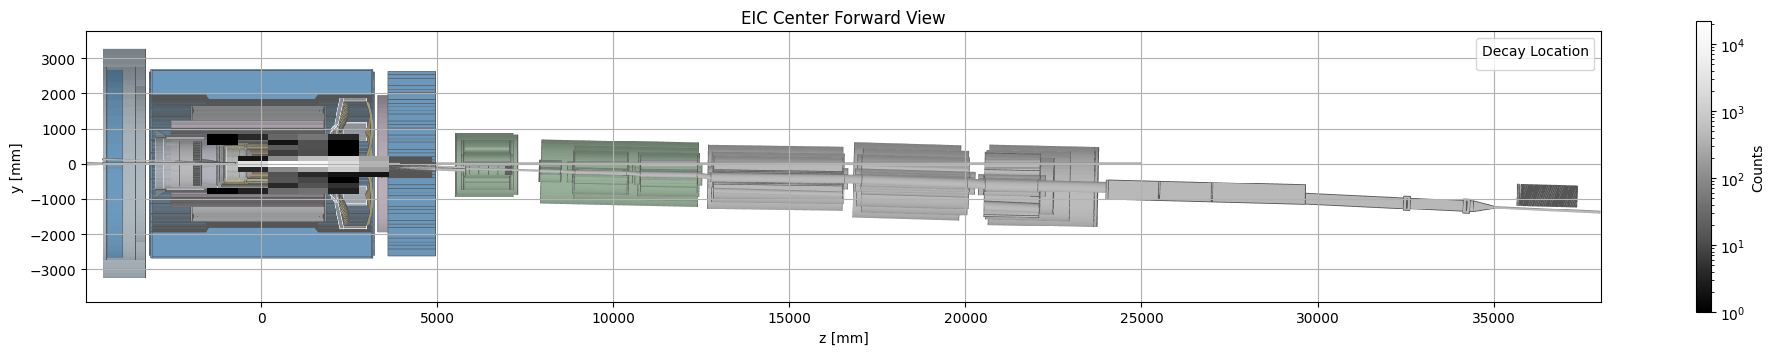

In [23]:
from matplotlib.colors import LogNorm

r_hist = np.sqrt(lam_prot_pimin_df['lam_epx']*lam_prot_pimin_df['lam_epx'] + 
                 lam_prot_pimin_df['lam_epy']*lam_prot_pimin_df['lam_epy']) * np.sign(lam_prot_pimin_df['lam_epy'])

fig, ax = create_plot_with_background()


x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

h = ax.hist2d(lam_prot_pimin_df['lam_epz'], r_hist, bins=50, 
              cmap='Greys_r', norm=LogNorm(),            
              range=[x_lim, y_lim]) 


ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

cbar = fig.colorbar(h[3], ax=ax, label='Counts', shrink=0.3)  

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)
ax.legend(title="Decay Location")

plt.tight_layout()
plt.show()

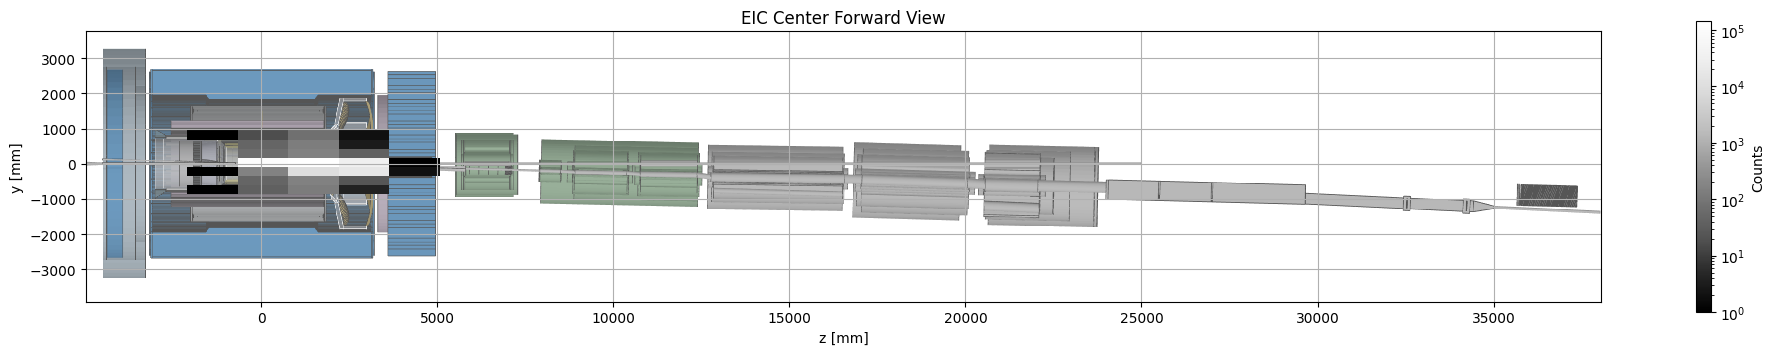

In [24]:
fig, ax = create_plot_with_background()


x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

h = ax.hist2d(df.lam_epz, df.lam_epx, bins=30,
               cmap='Greys_r',norm=LogNorm(), range=[x_lim, y_lim]) 

cbar = fig.colorbar(h[3], ax=ax, label='Counts', shrink=0.3) 

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)


plt.tight_layout()
plt.show()